In [1]:
from torchvision.transforms import transforms
from PIL import Image
from os import path
from constants import *
from matplotlib import pyplot as plt
from ctr_calculation import *

ModuleNotFoundError: No module named 'src'

In [17]:
transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]
mask_transformation = transforms.Compose(
    transformation_list)

image_name = "JPCLN009.png"

lung_mask = Image.open(path.join(JSRT_PATH, "masks/both_lungs", image_name)).resize((256, 256))
heart_mask = Image.open(path.join(JSRT_PATH, "masks/heart", image_name)).resize((256, 256))

lung_tensor = mask_transformation(lung_mask)
heart_tensor = mask_transformation(heart_mask)

Heart Diameter: 93
Lung Diameter: 193
Calculated CTR: 0.48186528497409326
No cardiomegaly


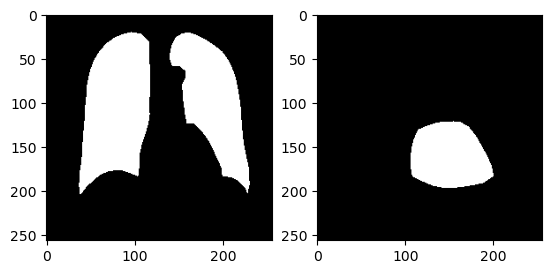

In [18]:
ctr = calculate_ctr(heart_mask=heart_tensor, lung_mask=lung_tensor)
heart_diameter = calculate_diameter(mask=heart_tensor)
lung_diameter = calculate_diameter(mask=lung_tensor)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lung_mask)
ax2.imshow(heart_mask)

print(f"Heart Diameter: {heart_diameter}")
print(f"Lung Diameter: {lung_diameter}")
print(f"Calculated CTR: {ctr}")
print('No cardiomegaly' if ctr <= 0.5 else 'Cardiomegaly')
